In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
state_df=pd.read_csv(r"state_wise_crop_production.csv")
state_df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [3]:
state_df.shape

(49, 6)

In [4]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


**From above information we can see that their is no null value present in dataframe**

In [5]:
state_df.columns = state_df.columns.str.replace(" ","")
state_df.columns

Index(['Crop', 'State', 'CostofCultivation(`/Hectare)A2+FL',
       'CostofCultivation(`/Hectare)C2', 'CostofProduction(`/Quintal)C2',
       'Yield(Quintal/Hectare)'],
      dtype='object')

In [6]:
#production of each crop 
crop_yield = state_df.groupby(['Crop']).sum()['Yield(Quintal/Hectare)']
crop_yield

Crop
ARHAR                     42.03
COTTON                    93.86
GRAM                      52.79
GROUNDNUT                 51.44
MAIZE                    153.99
MOONG                     20.98
PADDY                    231.48
RAPESEED AND MUSTARD      71.60
SUGARCANE               3952.48
WHEAT                    135.60
Name: Yield(Quintal/Hectare), dtype: float64

In [7]:
# cost of production 
crop_production = state_df.groupby(['Crop'])['CostofProduction(`/Quintal)C2'].sum()
crop_production

Crop
ARHAR                   12458.65
COTTON                  11359.83
GRAM                     8963.00
GROUNDNUT               13523.19
MAIZE                    3872.83
MOONG                   14950.50
PADDY                    3638.67
RAPESEED AND MUSTARD     7077.97
SUGARCANE                 493.24
WHEAT                    3068.47
Name: CostofProduction(`/Quintal)C2, dtype: float64

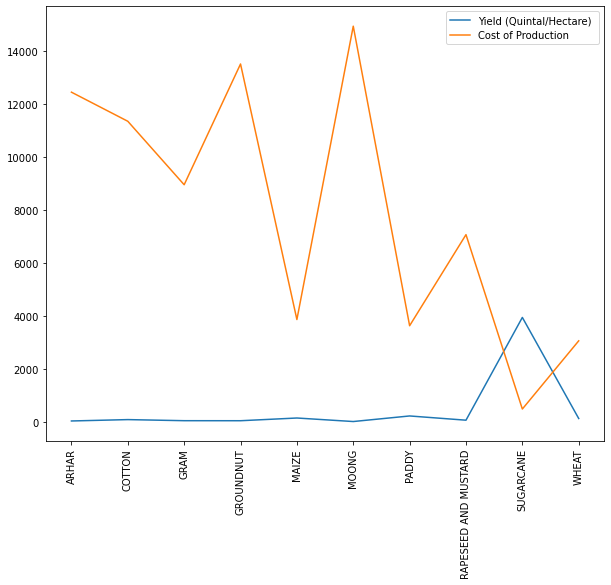

In [8]:
plt.figure(figsize=(10,8))
plt.plot(crop_yield,label="Yield (Quintal/Hectare) ")
plt.plot(crop_production,label="Cost of Production")
plt.legend()
plt.xticks(rotation ='vertical')
plt.show()

**Surcane has low cost of production per Quintal while other crop has high cost of production per Quintal**

In [9]:
state_group =state_df.groupby(['State'])


In [10]:
state_group=state_group.sum()[['CostofProduction(`/Quintal)C2', 'Yield(Quintal/Hectare)']]
state_group.shape

(13, 2)

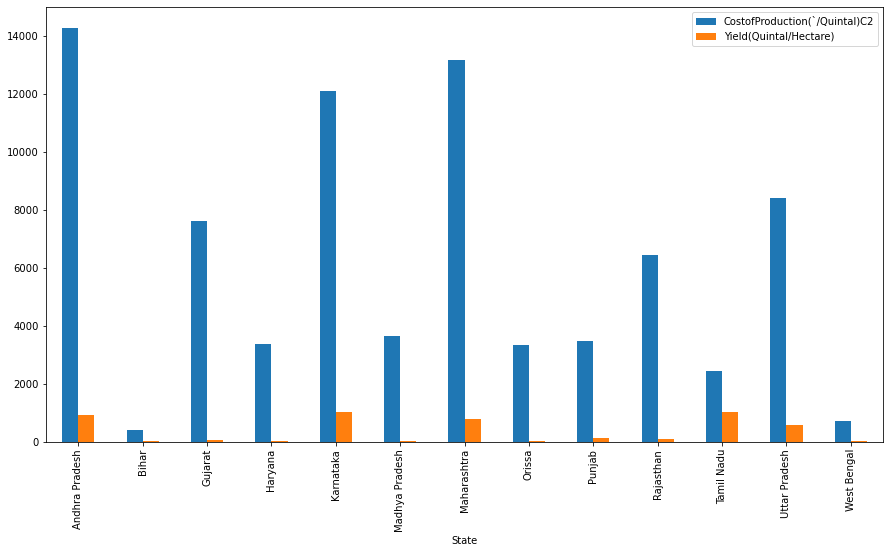

In [11]:

state_group.plot(kind='bar',figsize=(15,8))

plt.xticks(rotation='vertical')
plt.show()

In [12]:
crop_production = pd.read_csv("crop_production.csv")
crop_production

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [13]:
crop_production.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [14]:
crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [15]:
crop_production.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [16]:
crop_production.dropna(inplace=True)
crop_production.shape

(242361, 7)

In [17]:
crop_production.reset_index(inplace=True)

In [18]:
# check duplicate rows
crop_production.drop_duplicates(inplace=True)

In [19]:
crop_production['Production/Area'] = crop_production['Production']/crop_production['Area']
crop_production.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production/Area
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


**Created new column call "Production/Area" which describe the per area production of crop**

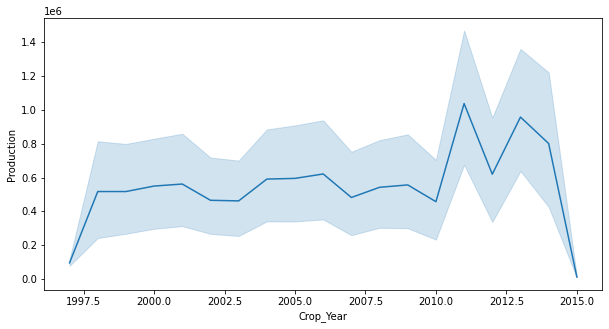

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(crop_production['Crop_Year'],crop_production['Production'])
plt.show()

**The above line plot shows the crop production from 1997 to 2015 and we can see that production after 2010 is increasing and around 2012 it decreased, but after 2012 it again increased.**

In [21]:
#Total production in every state
state = crop_production.groupby(['State_Name'],as_index=False)['Production'].sum()
state.head()

,State_Name,Production
0,Andaman and Nicobar Islands,7.182232e+08
1,Andhra Pradesh,1.732459e+10
2,Arunachal Pradesh,6.823913e+06
3,Assam,2.111752e+09
4,Bihar,3.664836e+08


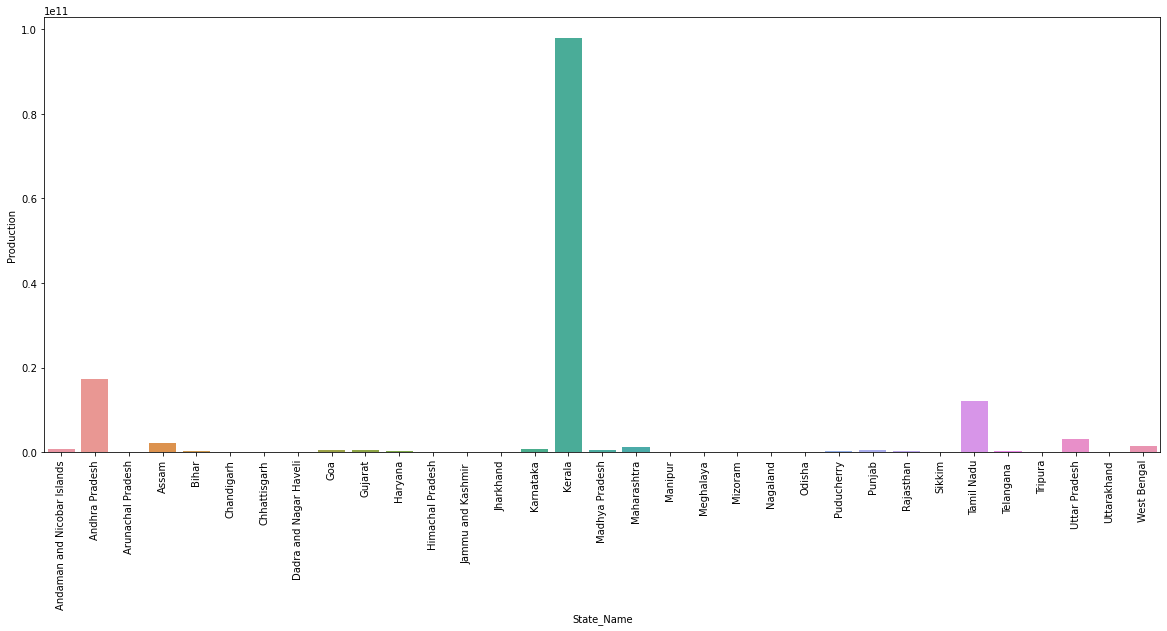

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x='State_Name',y='Production',data=state)
plt.xticks(rotation='vertical')
plt.show()

**The above barplot shows that in the state "KERALA" there is the most production of the crops, after that in "Tamil Nadu" and "Andra Pradesh". Above all three southern states, we can assume that this state produces a large volume of crops.**

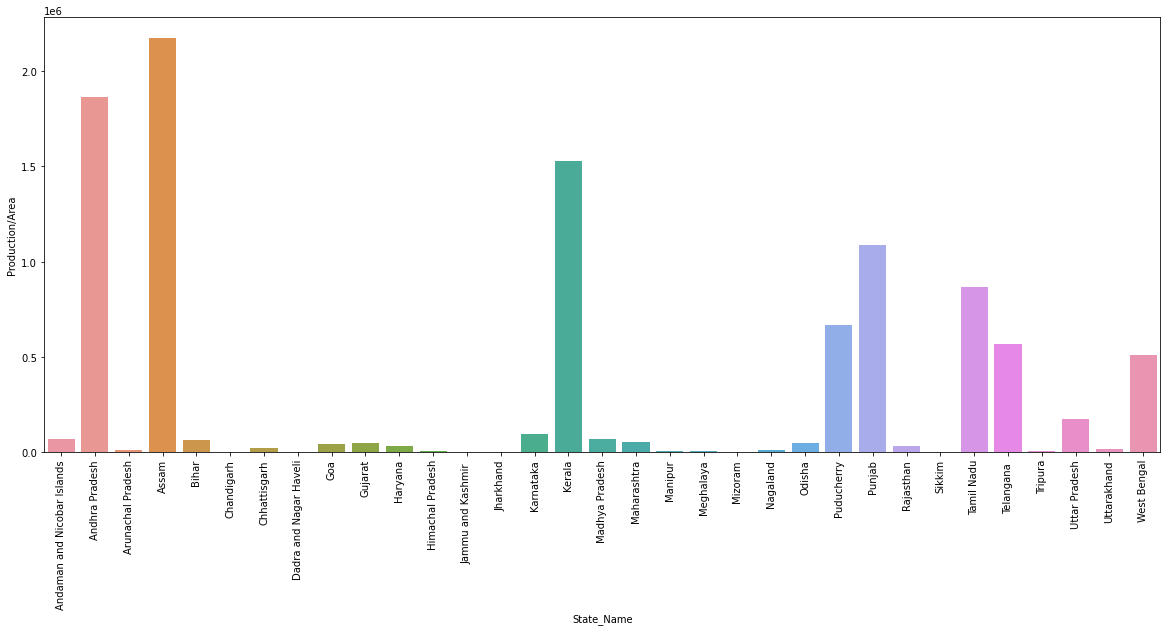

In [23]:
#Production per area in every state

state = crop_production.groupby(['State_Name'],as_index=False)['Production/Area'].sum()
plt.figure(figsize=(20,8))
sns.barplot(x='State_Name',y='Production/Area',data=state)
plt.xticks(rotation='vertical')
plt.show()

**This bar plot tells us about the crop production per area. Production in each state means production according to their land size.**

In [24]:
season = crop_production.groupby(['Season'],as_index=False)['Season'].value_counts()
season.head()

,Season,count
0,Autumn,4930
1,Kharif,94283
2,Rabi,66160
3,Summer,14811
4,Whole Year,56127


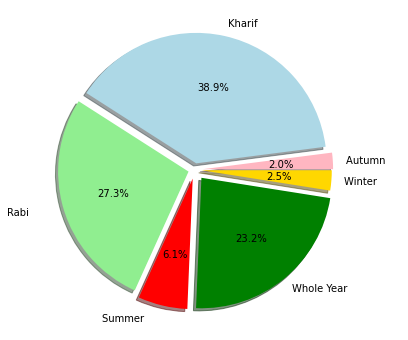

In [25]:
plt.figure(figsize=(6,6))
color = ('LightPink', "LightBlue" , 'LightGreen','red','green','Gold')
plt.pie(season['count'],
        autopct = '%1.1f%%',
        labels=season['Season'],
        explode = (0.06,0.05,0.05,0.07,0.08,0.05),
        shadow=True,
        colors=color)
plt.show()

In [26]:
top_crop  = crop_production.groupby(['Crop'],as_index=False)['Production'].sum()
top_crop=top_crop.sort_values(['Production'],ascending=False).reset_index()
top_crop.head()


,index,Crop,Production
0,28,Coconut,1.299816e+11
1,106,Sugarcane,5.535682e+09
2,95,Rice,1.605470e+09
3,119,Wheat,1.332826e+09
4,87,Potato,4.248263e+08


In [27]:
top_crop.drop(['index'],axis=1,inplace=True)
top_crop.head()

,Crop,Production
0,Coconut,1.299816e+11
1,Sugarcane,5.535682e+09
2,Rice,1.605470e+09
3,Wheat,1.332826e+09
4,Potato,4.248263e+08


**This is 5 most produce crop in india between 1997 to 2015 so we perform some analysis on some of most produce crop in india**

### Analysis on Rice

In [28]:
rice_df = crop_production[crop_production['Crop']=='Rice']
rice_df.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production/Area
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059
12,12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458
18,18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000
27,27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038
36,36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797


In [29]:
rice_df.shape

(15082, 9)

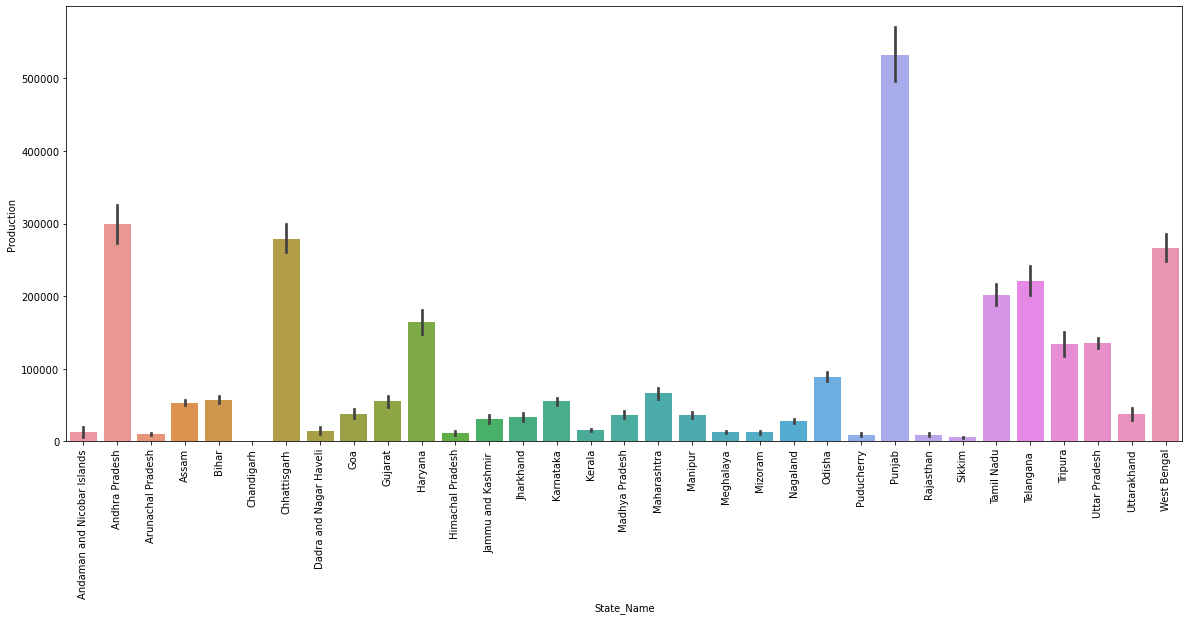

In [30]:
#State wise production of rice 
plt.figure(figsize=(20,8))
sns.barplot('State_Name','Production',data=rice_df)
plt.xticks(rotation='vertical')
plt.show()

**Rice production mostly in Punjab,haryana and chhattusgarh and And Andra pradesh etc.**

<AxesSubplot:xlabel='Season', ylabel='Production'>

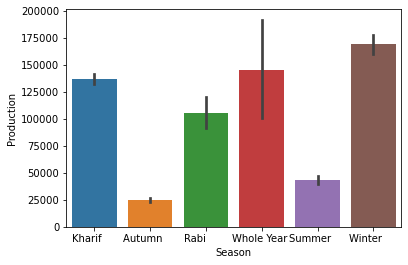

In [31]:
sns.barplot('Season','Production',data=rice_df)

**Rice Production is very less in summer and Autumn season so we can say that this season may not good for production of rice**

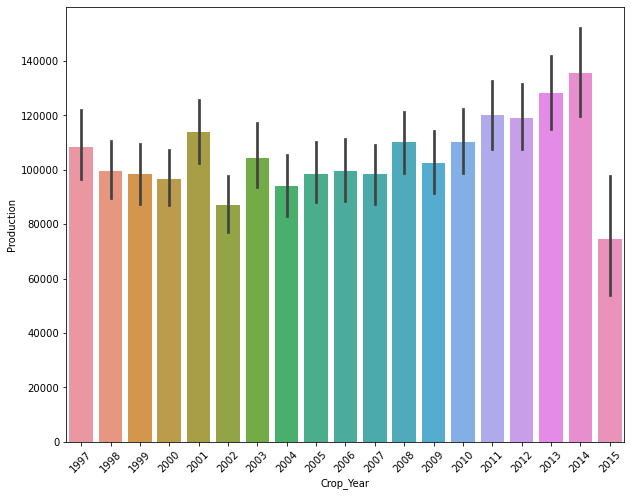

In [32]:
#rice production  year wise
plt.figure(figsize=(10,8))
sns.barplot('Crop_Year','Production',data=rice_df)
plt.xticks(rotation=45)
plt.show()

## Analysis of Coconut

In [33]:
coc_df = crop_production[crop_production['Crop']=="Coconut "]
coc_df.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production/Area
5,5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,3583.223250
14,14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,3542.056075
23,23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,3700.109649
32,32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,3750.668590
41,41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,2847.559351


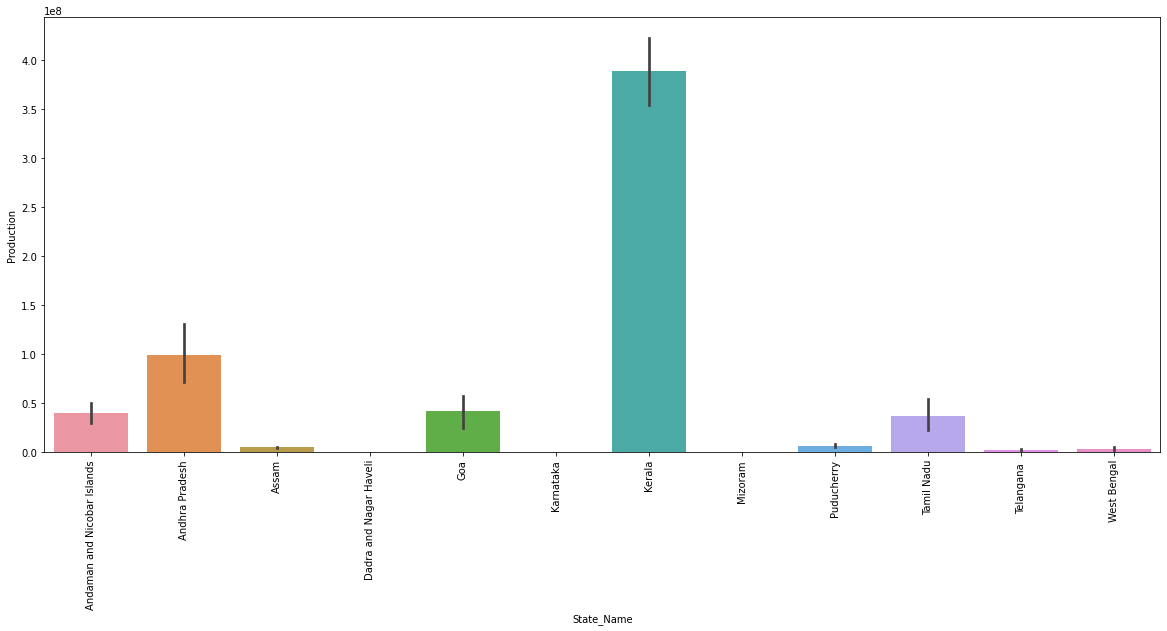

In [34]:
#State wise production of rice 
plt.figure(figsize=(20,8))
sns.barplot('State_Name','Production',data=coc_df)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Season', ylabel='Production'>

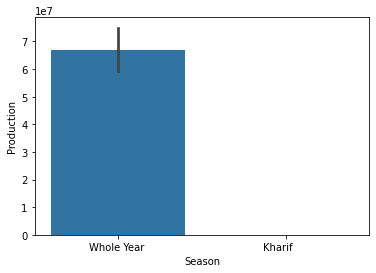

In [35]:
sns.barplot('Season','Production',data=coc_df)

**Because their climate is best suited for coconut production, the southern states produce the majority of coconut in whole year**. 

### Analysis of wheat

In [36]:
wheat_df = crop_production[crop_production['Crop']=="Wheat"]

In [37]:
wheat_df.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production/Area
228,230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,0.666667
253,255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,0.500000
282,284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,0.669704
324,326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,0.571154
370,372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,0.693811


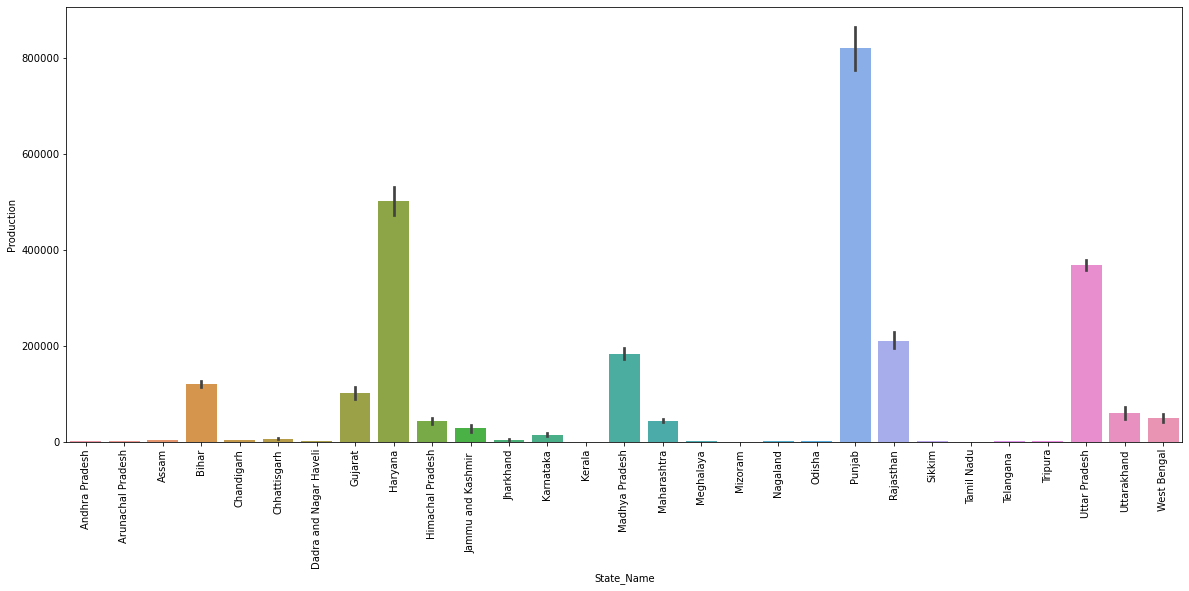

In [38]:
#State wise production of rice 
plt.figure(figsize=(20,8))
sns.barplot('State_Name','Production',data=wheat_df)
plt.xticks(rotation='vertical')
plt.show()

**Wheat production in northern state like punjab,haryana,Mp,Up,Rajasthan,Bihar are more because this environment best suited for wheat**

<AxesSubplot:xlabel='Season', ylabel='Production'>

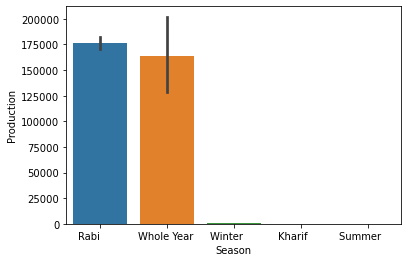

In [40]:
sns.barplot('Season','Production',data=wheat_df)

**Wheat is most produce during rabi season means October-march**

In [41]:
crop_production

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production/Area
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...,...
242356,246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
242357,246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
242358,246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
242359,246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848
